In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
import torch

if torch.cuda.is_available():
    print(f"✅ CUDA is available. Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("⚠ CUDA not available. Using CPU.")

✅ CUDA is available. Number of GPUs: 1
GPU Name: NVIDIA T500


In [3]:
# ✅ Replace with your actual CSV file path
csv_file_path = r"C:\Users\cx3garg\Repo\Test\CV_CL\generated\physicians\physicians_modular.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path, encoding="utf-8")

# Convert all string entries in the DataFrame to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df


C:\Users\cx3garg\AppData\Local\Temp\ipykernel_17684\3794604789.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,id,gender,cv_cover_letter
0,1,male,"cv:\n**john a. smith, md**\n\n**contact inform..."
1,2,male,"cv:\n**dr. johnathan smith, md** \n[contact i..."
2,3,male,"cv:\n**johnathan a. smith, md**\n\n**contact i..."
3,4,male,"cv:\n**john doe, md** \n[contact information]..."
4,5,male,"cv:\n**dr. john a. smith, md**\n\n**contact in..."
5,6,male,cv:\n**curriculum vitae**\n\n**dr. johnathan s...
6,7,male,"cv:\n**john a. smith, md**\n\n**location:** no..."
7,8,male,"cv:\n**john a. smith, md**\n\n**contact inform..."
8,9,male,"cv:\n**dr. john a. smith, md**\n\n**contact in..."
9,10,male,"cv:\n**john a. smith, md** \n[address] \n[ci..."


In [4]:

# Use only the 'hard_text' column for text input
texts = df["cv_cover_letter"].fillna("").astype(str).tolist()

print("Number of valid texts:", len(texts))
print(texts[:5])  # preview


Number of valid texts: 50
['cv:\n**john a. smith, md**\n\n**contact information:**\n123 medical lane  \nraleigh, nc 27601  \nemail: john.smith@email.com  \nphone: (555) 123-4567  \n\n---\n\n**profile summary:**\n\nwith over 16 years of dedicated experience in general medicine, i am a board-certified physician committed to delivering compassionate, patient-centered care. my expertise spans across family medicine, internal medicine, pediatrics, dermatology, and oncology, with a strong emphasis on accurate diagnosis and effective treatment planning. i am driven by a passion for improving patient outcomes through collaboration and education, and i am adept at managing both acute and chronic medical conditions. my career is marked by a consistent focus on maintaining meticulous emr/ehr documentation and fostering trust within multidisciplinary teams.\n\n---\n\n**skills:**\n\n- advanced diagnostic and clinical research capabilities in general medicine.\n- proficient in managing complex cases

In [5]:
# Remove NaN, non-string, or empty values
texts = [t for t in texts if isinstance(t, str) and t.strip()]

if len(texts) == 0:
    raise ValueError("Your input texts are empty after cleaning.")


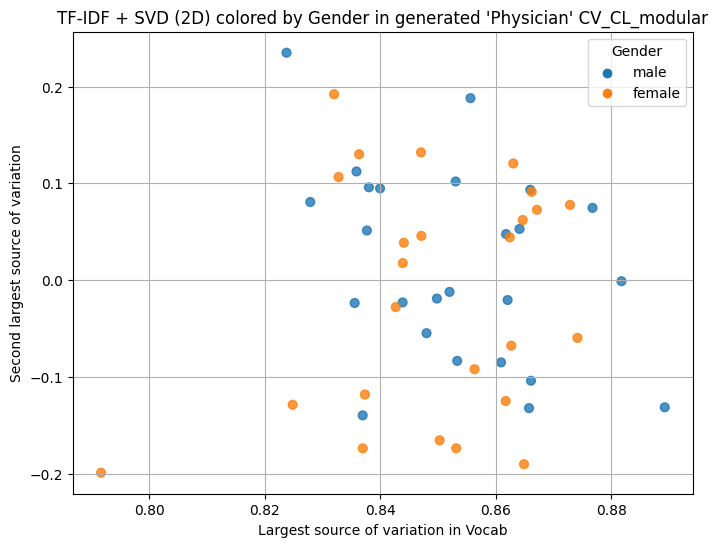

In [6]:

# ✅ Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# ✅ Dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# ✅ Clustering visualization (scatter plot)
plt.figure(figsize=(8, 6))

gender_col = "gender"

# Mask for male/female rows (optional but clean)
mask = df[gender_col].isin(["male", "female"])

# Assign colors
color_map = {"male": "C0", "female": "C1"}
colors = df.loc[mask, gender_col].map(color_map)

# Scatter plot
plt.scatter(reduced_matrix[mask, 0], reduced_matrix[mask, 1],  c=colors, s=40, alpha=0.8)

# Add legend manually
for g, c in color_map.items():
    plt.scatter([], [], c=c, label=g)

plt.legend(title="Gender")
plt.title("TF-IDF + SVD (2D) colored by Gender in generated 'Physician' CV_CL_modular")
plt.xlabel("Largest source of variation in Vocab")
plt.ylabel("Second largest source of variation")
plt.grid(True)
plt.show()

In [7]:
# Text → TF-IDF vectors
X = tfidf_vectorizer.transform(texts)
y = (df["gender"] == "female").astype(int)   # female=1, male=0

In [8]:

# gender vector: female=1, male=0
gender = (df[gender_col] == "female").astype(int).values

# tfidf matrix: X
word_gender_corr = np.corrcoef(X.toarray().T, gender)[-1, :-1]

In [9]:
feature_names = tfidf_vectorizer.get_feature_names_out()

def component_table(comp_idx, topn=20):
    comp = svd.components_[comp_idx]
    top_idx = np.argsort(comp)[-topn:][::-1]

    rows = []
    for i in top_idx:
        rows.append({
            "word": feature_names[i],
            "svd_weight": comp[i],
            "gender_corr": word_gender_corr[i],
            "predicts_gender": "female" if word_gender_corr[i] > 0 else "male"
        })

    return pd.DataFrame(rows)



In [10]:
table1 = component_table(0, 20)
table2 = component_table(1, 20)


print("Component 1 — Top Words and Gender Association")
display(table1)

print("\nComponent 2 — Top Words and Gender Association")
display(table2)



Component 1 — Top Words and Gender Association


,word,svd_weight,gender_corr,predicts_gender
0,patient,0.374283,-0.044891,male
1,medicine,0.362030,-0.309300,male
2,care,0.318196,-0.040894,male
3,medical,0.269864,0.486445,female
4,hospital,0.206921,-0.168057,male
5,treatment,0.159801,-0.130314,male
6,clinical,0.146862,-0.115521,male
7,physician,0.108264,0.135810,female
8,internal,0.107221,-0.142144,male
9,skills,0.103430,0.154482,female



Component 2 — Top Words and Gender Association


,word,svd_weight,gender_corr,predicts_gender
0,raleigh,0.208545,0.083572,female
1,nc,0.173039,-0.063864,male
2,123,0.158564,0.037002,female
3,health,0.141111,-0.145155,male
4,durham,0.130826,-0.074503,male
5,fluent,0.103759,0.058579,female
6,new,0.102700,0.031132,female
7,blood,0.098969,-0.095217,male
8,decisions,0.088587,-0.007150,male
9,delhi,0.088232,-0.071816,male


In [11]:
# -------------------------
# Gender classifier 

# 2. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# 3. Map coefficients to words
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# 4. Create DataFrame with word, coefficient, and predicted gender association
# Positive coefficient → more associated with Female (1), negative → Male (0)
word_gender_df = pd.DataFrame({
    'word': feature_names,
    'coefficient': coefficients,
    'predicted_gender': ['Female' if c > 0 else 'Male' for c in coefficients]
}).sort_values(by='coefficient', ascending=False)

# 5. Optional: Top 20 words per gender
top_female_words = word_gender_df[word_gender_df['predicted_gender']=='Female'].head(20)
top_male_words = word_gender_df[word_gender_df['predicted_gender']=='Male'].tail(20)

# Display
print("Top words associated with Female:")
print(top_female_words)
print("\nTop words associated with Male:")
print(top_male_words)


Top words associated with Female:
               word  coefficient predicted_gender
691         medical     0.419989           Female
1121  understanding     0.178550           Female
716           month     0.163345           Female
1168         worked     0.154949           Female
254     contributed     0.153685           Female
641          latest     0.152480           Female
524         highest     0.147500           Female
843       processes     0.145799           Female
371       efficient     0.140527           Female
369        efficacy     0.135967           Female
516          having     0.130950           Female
435        evidence     0.126587           Female
1108     treatments     0.126201           Female
35          abreast     0.125717           Female
1174           year     0.121517           Female
387     emphasizing     0.120113           Female
925        relevant     0.119669           Female
870        provides     0.118304           Female
741           of

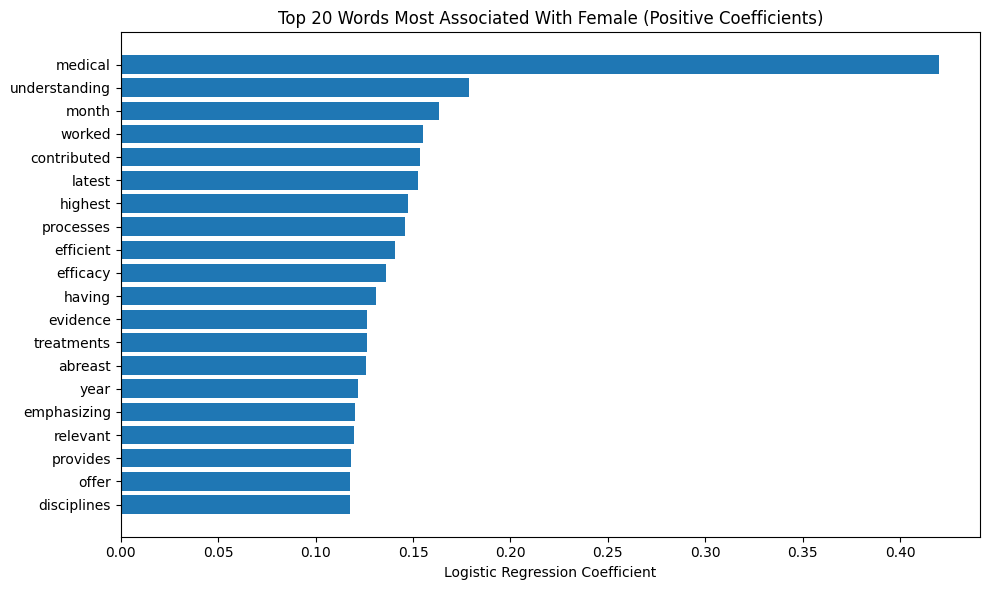

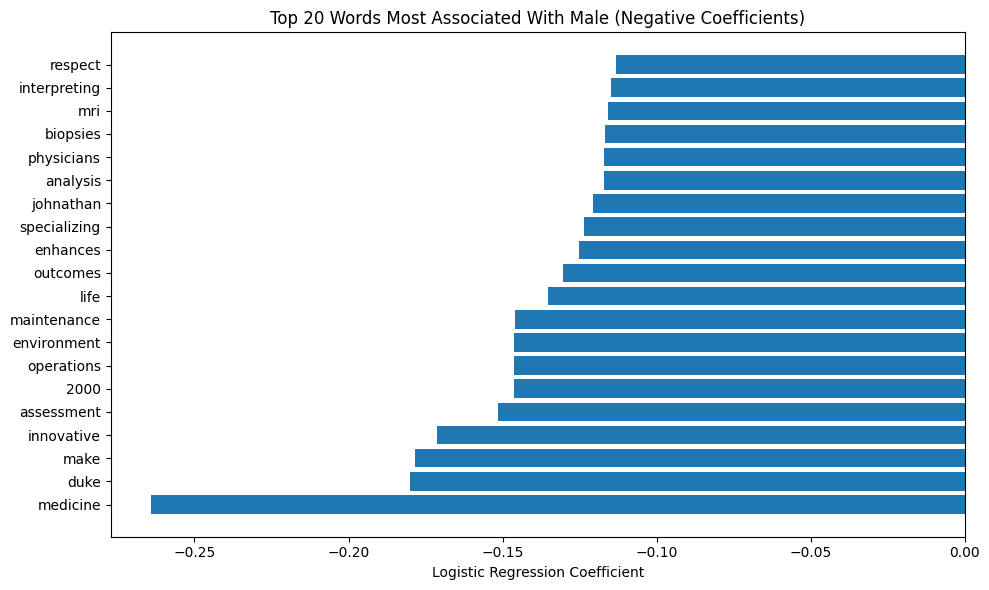

In [12]:
import matplotlib.pyplot as plt

# --- Top 20 words most associated with Female ---
plt.figure(figsize=(10, 6))
plt.barh(top_female_words["word"], top_female_words["coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 20 Words Most Associated With Female (Positive Coefficients)")
plt.xlabel("Logistic Regression Coefficient")
plt.tight_layout()
plt.show()

# --- Top 20 words most associated with Male ---
plt.figure(figsize=(10, 6))
plt.barh(top_male_words["word"], top_male_words["coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 20 Words Most Associated With Male (Negative Coefficients)")
plt.xlabel("Logistic Regression Coefficient")
plt.tight_layout()
plt.show()


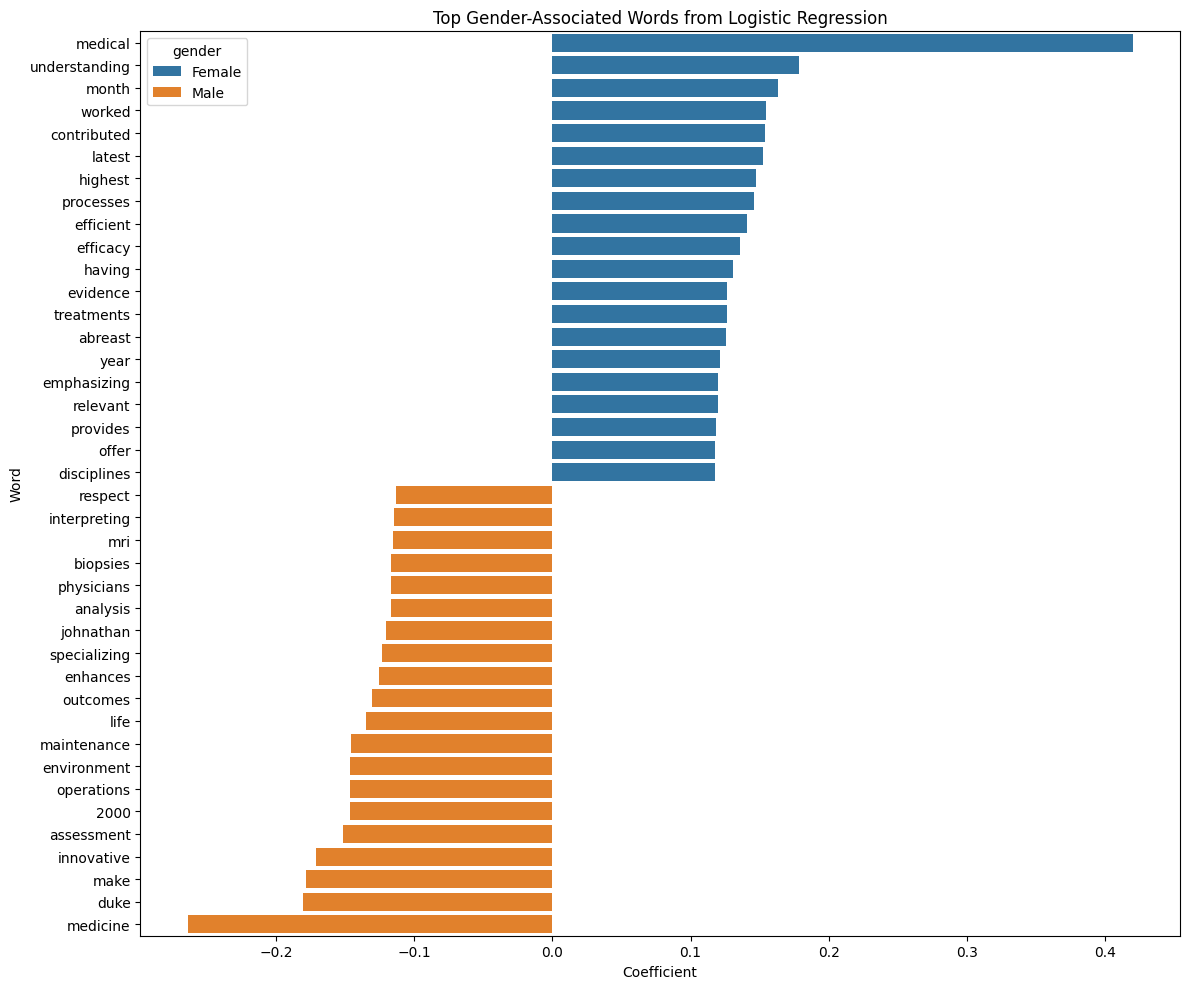

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = pd.concat([
    top_female_words.assign(gender="Female"),
    top_male_words.assign(gender="Male")
])

plt.figure(figsize=(12, 10))
sns.barplot(
    data=subset,
    y="word",
    x="coefficient",
    hue="gender",
    dodge=False
)
plt.title("Top Gender-Associated Words from Logistic Regression")
plt.xlabel("Coefficient")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


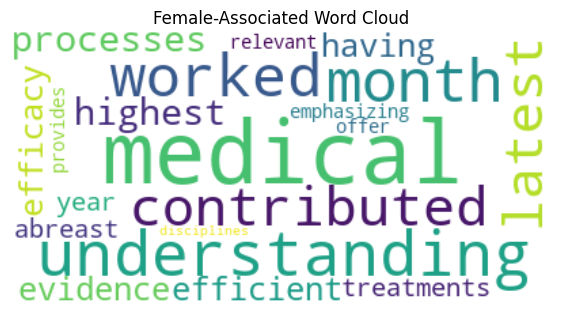

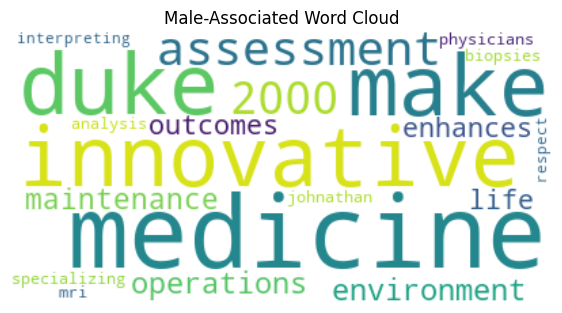

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

female_weights = {row.word: row.coefficient for _, row in top_female_words.iterrows()}
male_weights = {row.word: -row.coefficient for _, row in top_male_words.iterrows()}

# Female
plt.figure(figsize=(7,7))
wc = WordCloud(background_color="white").generate_from_frequencies(female_weights)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Female-Associated Word Cloud")
plt.show()

# Male
plt.figure(figsize=(7,7))
wc = WordCloud(background_color="white").generate_from_frequencies(male_weights)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Male-Associated Word Cloud")
plt.show()
